<a href="https://www.kaggle.com/code/udayr007/timeseriesonbooksales?scriptVersionId=152199948" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../input/ts-course-data/book_sales.csv", index_col = 'Date', parse_dates=['Date']).drop(['Paperback'], axis = 1)
df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


In [3]:
df.shape

(30, 1)

In [4]:
df.isnull().sum()

Hardcover    0
dtype: int64

In [5]:
import numpy as np
df['Time'] = np.arange(len(df.index))


In [6]:
df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_20/159321616.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


Text(0.5, 1.0, 'Time plot of Hardcover Sales')

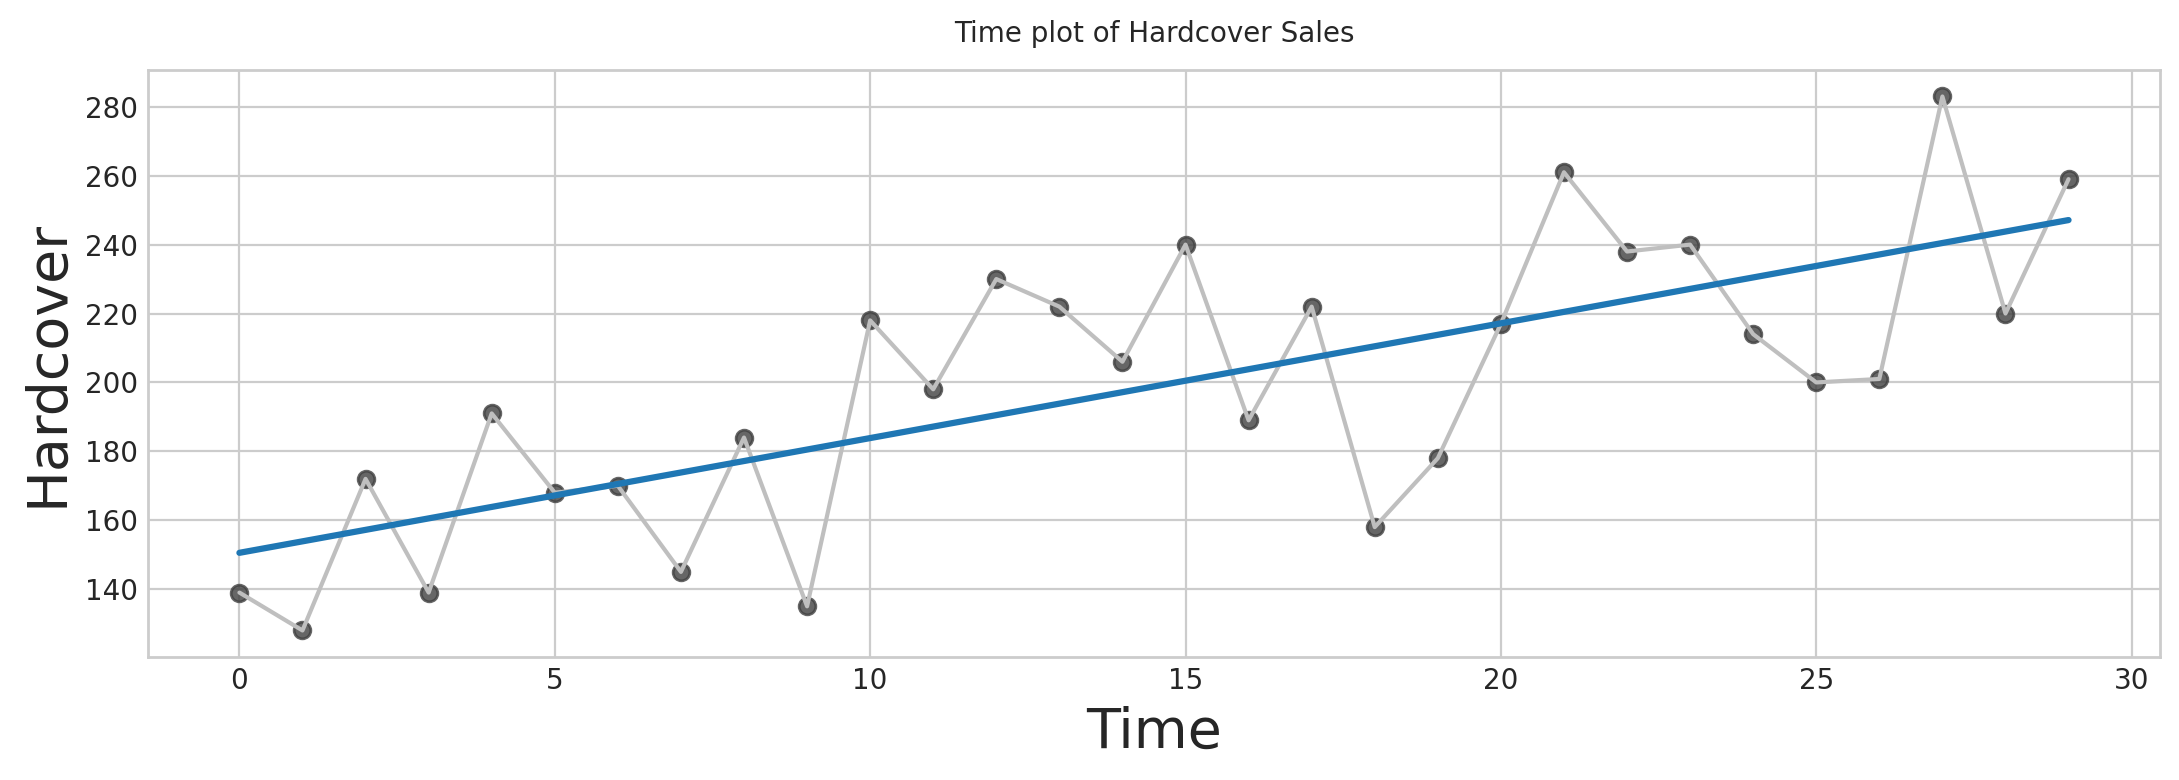

In [8]:
plt.style.use("seaborn-whitegrid")
plt.rc('figure', autolayout = True, figsize=(11,4), titlesize=18, titleweight='bold',labelweight = 20, labelsize=20)
plt.rc('axes',labelweight = 20, labelsize=20,titleweight=20,titlesize=10, titlepad=10 )

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

fig,ax=plt.subplots()
ax.plot('Time','Hardcover', data = df,color='0.75')
ax = sns.regplot(x = 'Time', y = 'Hardcover', data=df, ci=None, scatter_kws = dict(color='0.25'))
plt.title('Time plot of Hardcover Sales')

In [9]:
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns=['Hardcover','Lag_1'])
df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


Text(0.5, 1.0, 'Lag plot of Hardcover Sales')

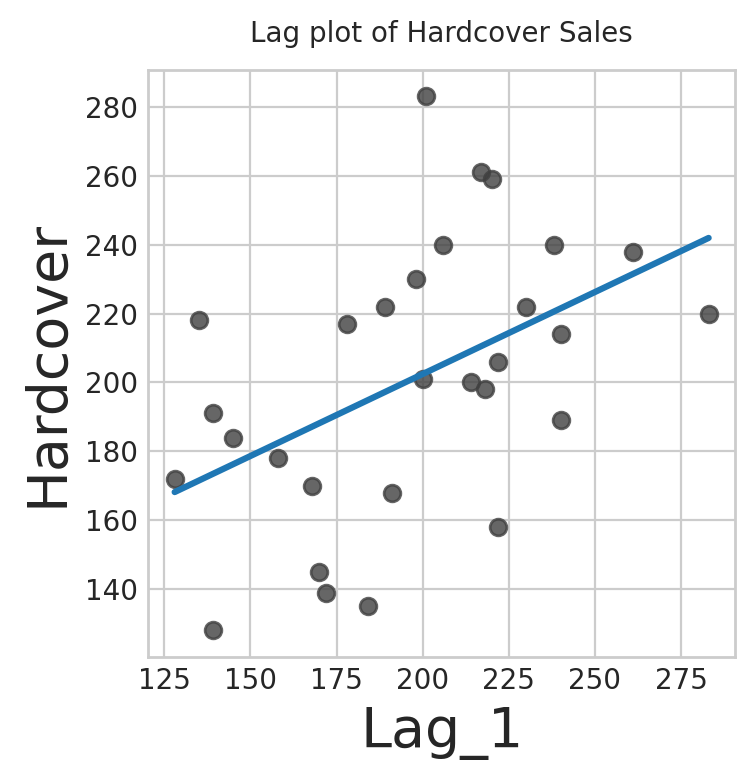

In [10]:
fig, ax = plt.subplots()
ax = sns.regplot(x = 'Lag_1', y = 'Hardcover', data = df, ci = None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
plt.title('Lag plot of Hardcover Sales')

In [11]:
from pathlib import Path
from warnings import simplefilter
simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout = True, figsize = (11,4), titleweight = 10, titlesize = 10)
plt.rc('axes', labelweight = 'bold', labelsize = 'large', titlepad = 10, titlesize = 10)
plot_params = dict( color = '0.75', style = '.-', markeredgecolor = '0.25', markerfacecolor = '0.25', legend = True)

%matplotlib inline
%config InlineBackend.figure_formats = 'retina'

data_dir = Path("../input/ts-course-data")
tunnel = pd.read_csv(data_dir / "tunnel.csv", parse_dates = ['Day'])

In [13]:
tunnel.head()

,Day,NumVehicles
0,2003-11-01,103536
1,2003-11-02,92051
2,2003-11-03,100795
3,2003-11-04,102352
4,2003-11-05,106569


In [14]:
tunnel = tunnel.set_index('Day')
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [15]:
tunnel = tunnel.to_period()
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [16]:
df = tunnel.copy()
df['Time'] = np.arange(len(tunnel.index))
df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [17]:
from sklearn.linear_model import LinearRegression

X = df.loc[:,['Time']]
y = df.loc[:,'NumVehicles']

model = LinearRegression()
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index = X.index)
y_pred

Day
2003-11-01     98176.206344
2003-11-02     98198.703794
2003-11-03     98221.201243
2003-11-04     98243.698693
2003-11-05     98266.196142
                  ...      
2005-11-12    114869.313898
2005-11-13    114891.811347
2005-11-14    114914.308797
2005-11-15    114936.806247
2005-11-16    114959.303696
Freq: D, Length: 747, dtype: float64

Text(0.5, 1.0, 'Time plot of Tunnel Traffic')

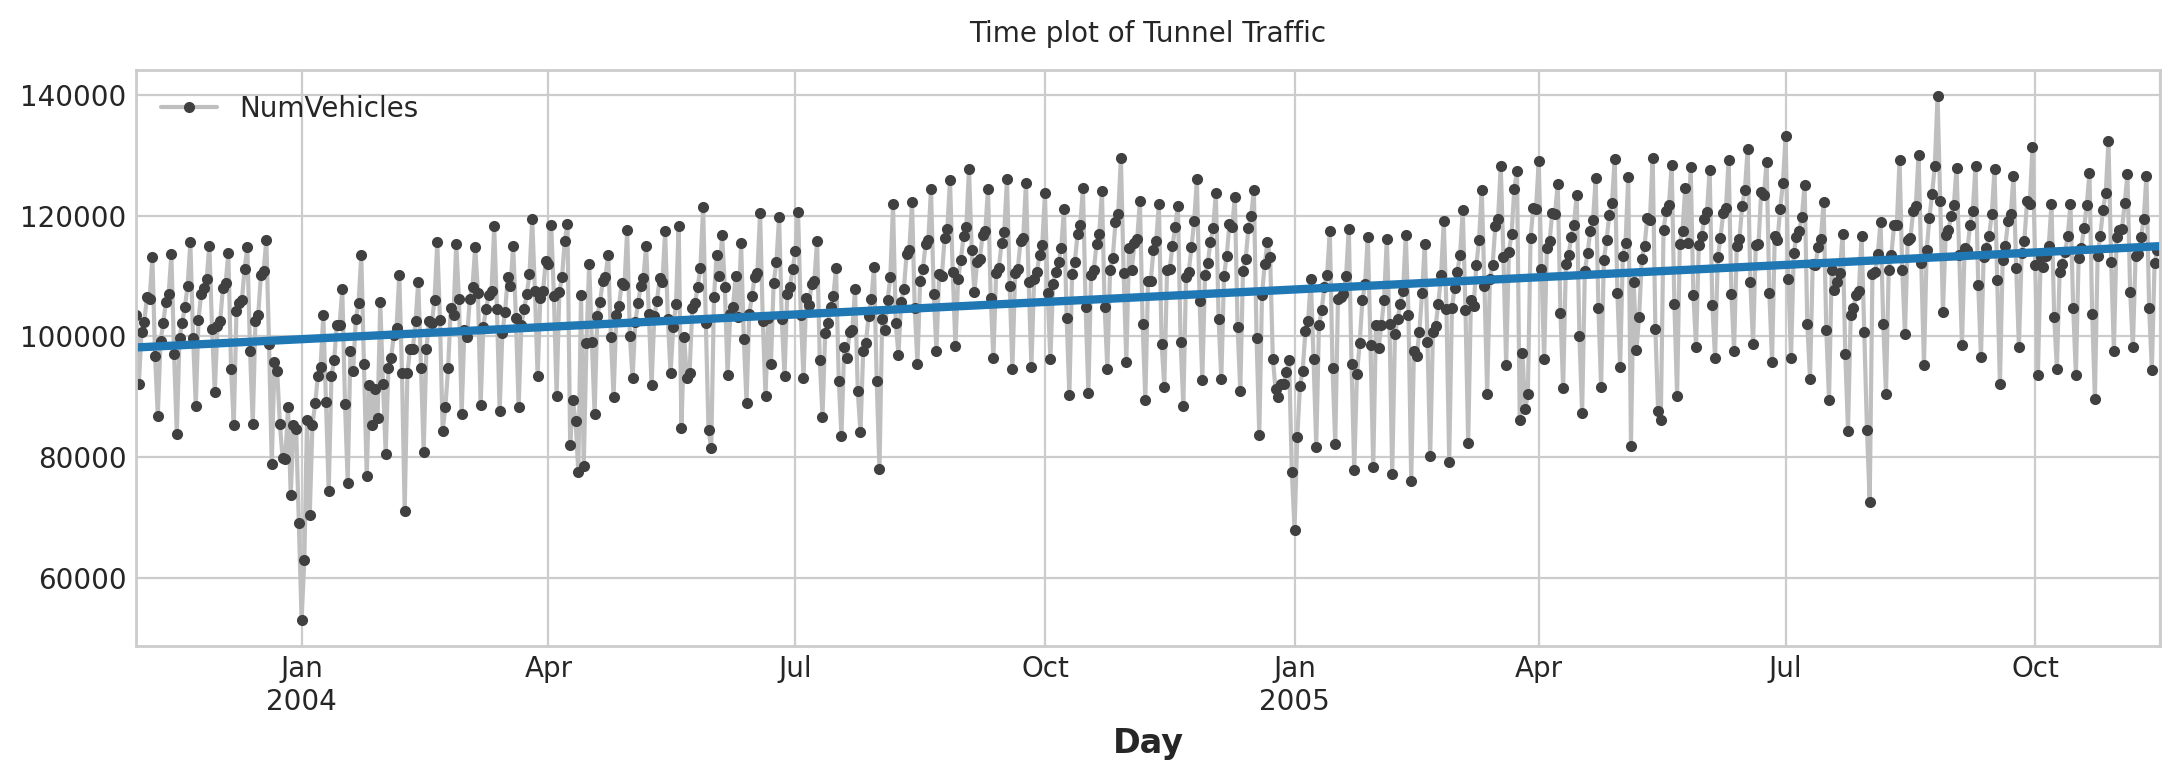

In [18]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
plt.title('Time plot of Tunnel Traffic')

In [19]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [20]:
df.shape

(747, 3)

In [21]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']]
# print(/X)
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'NumVehicles']  # create the target
# print(y)
y, X = y.align(X, join = 'inner')

model = LinearRegression()
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index = X.index)

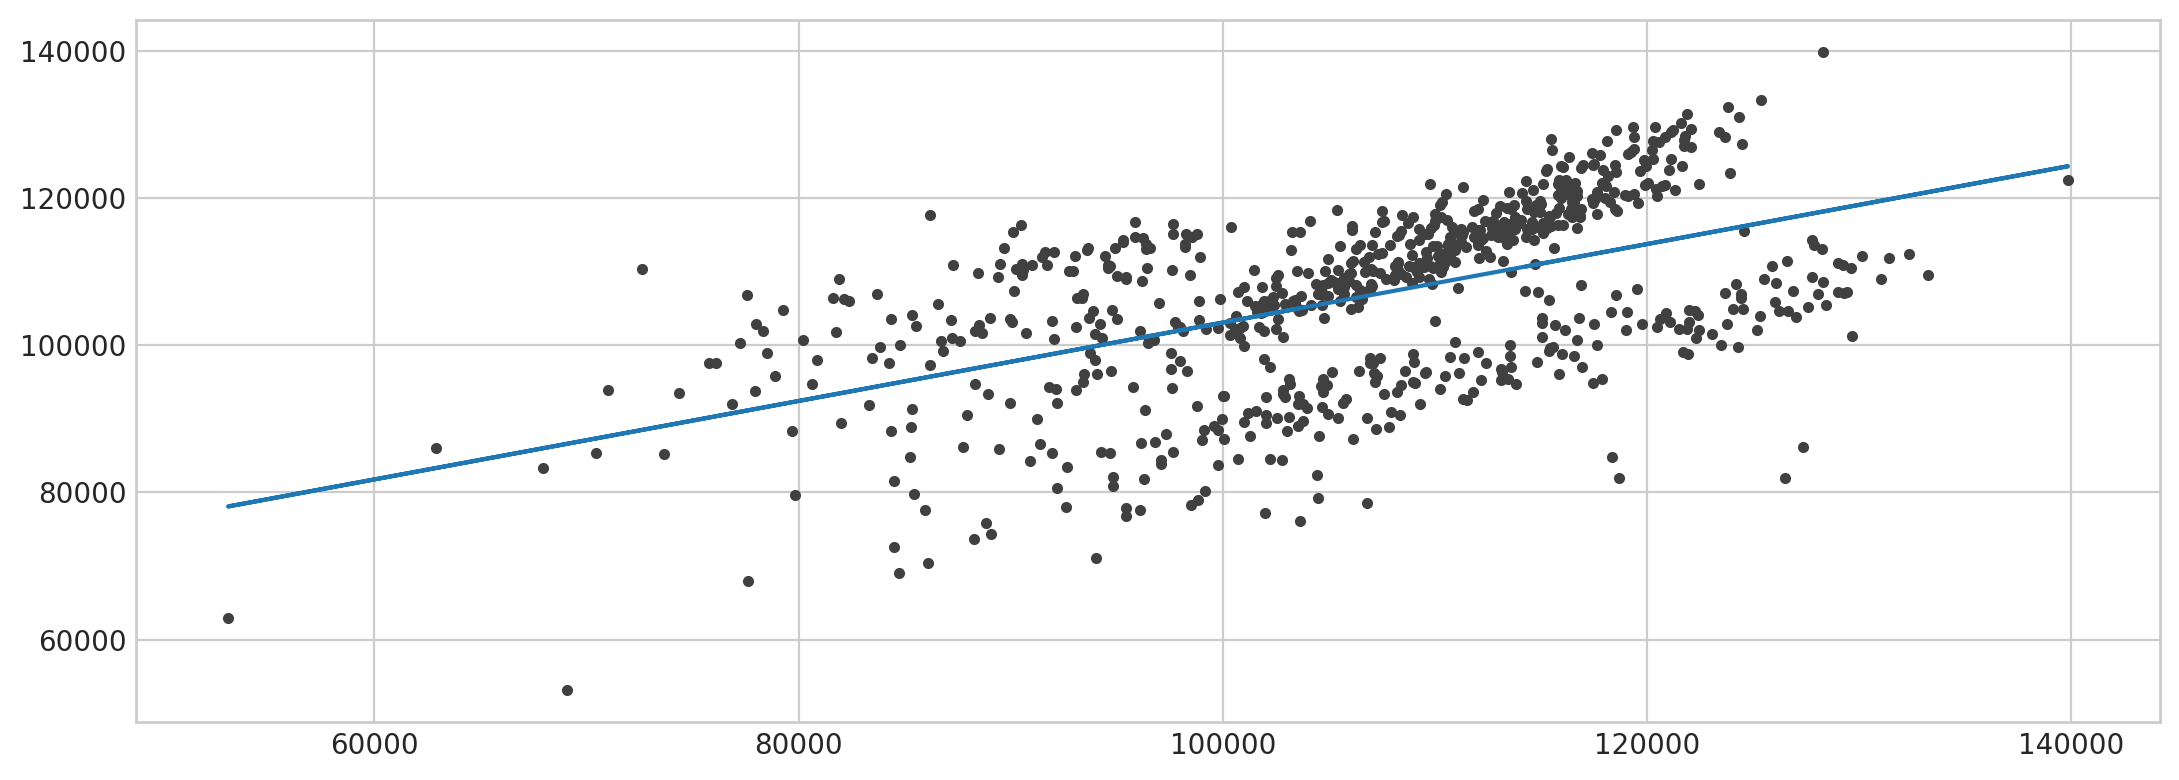

In [22]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)


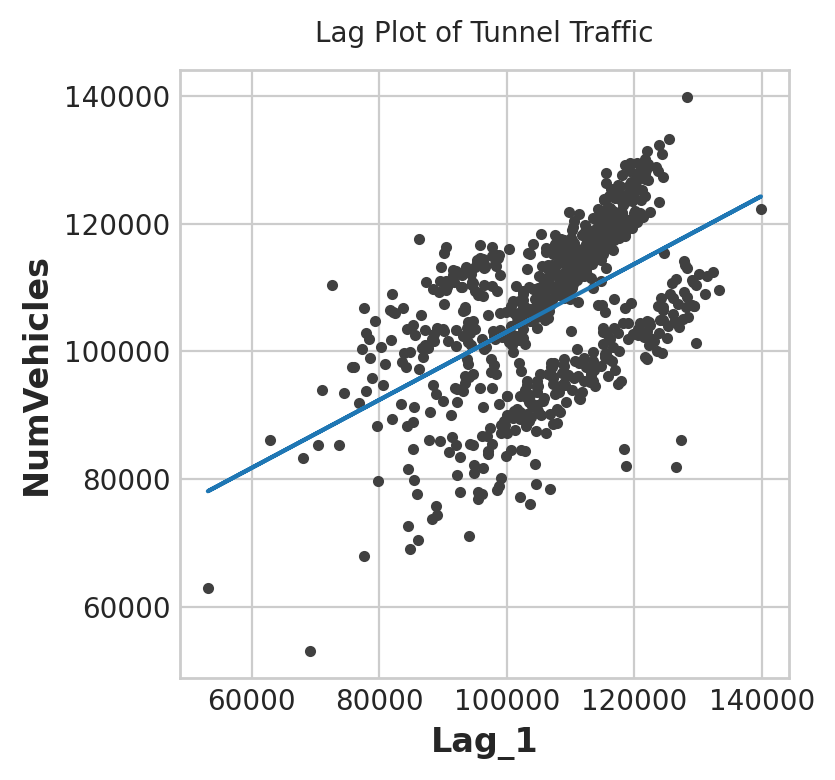

In [23]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');

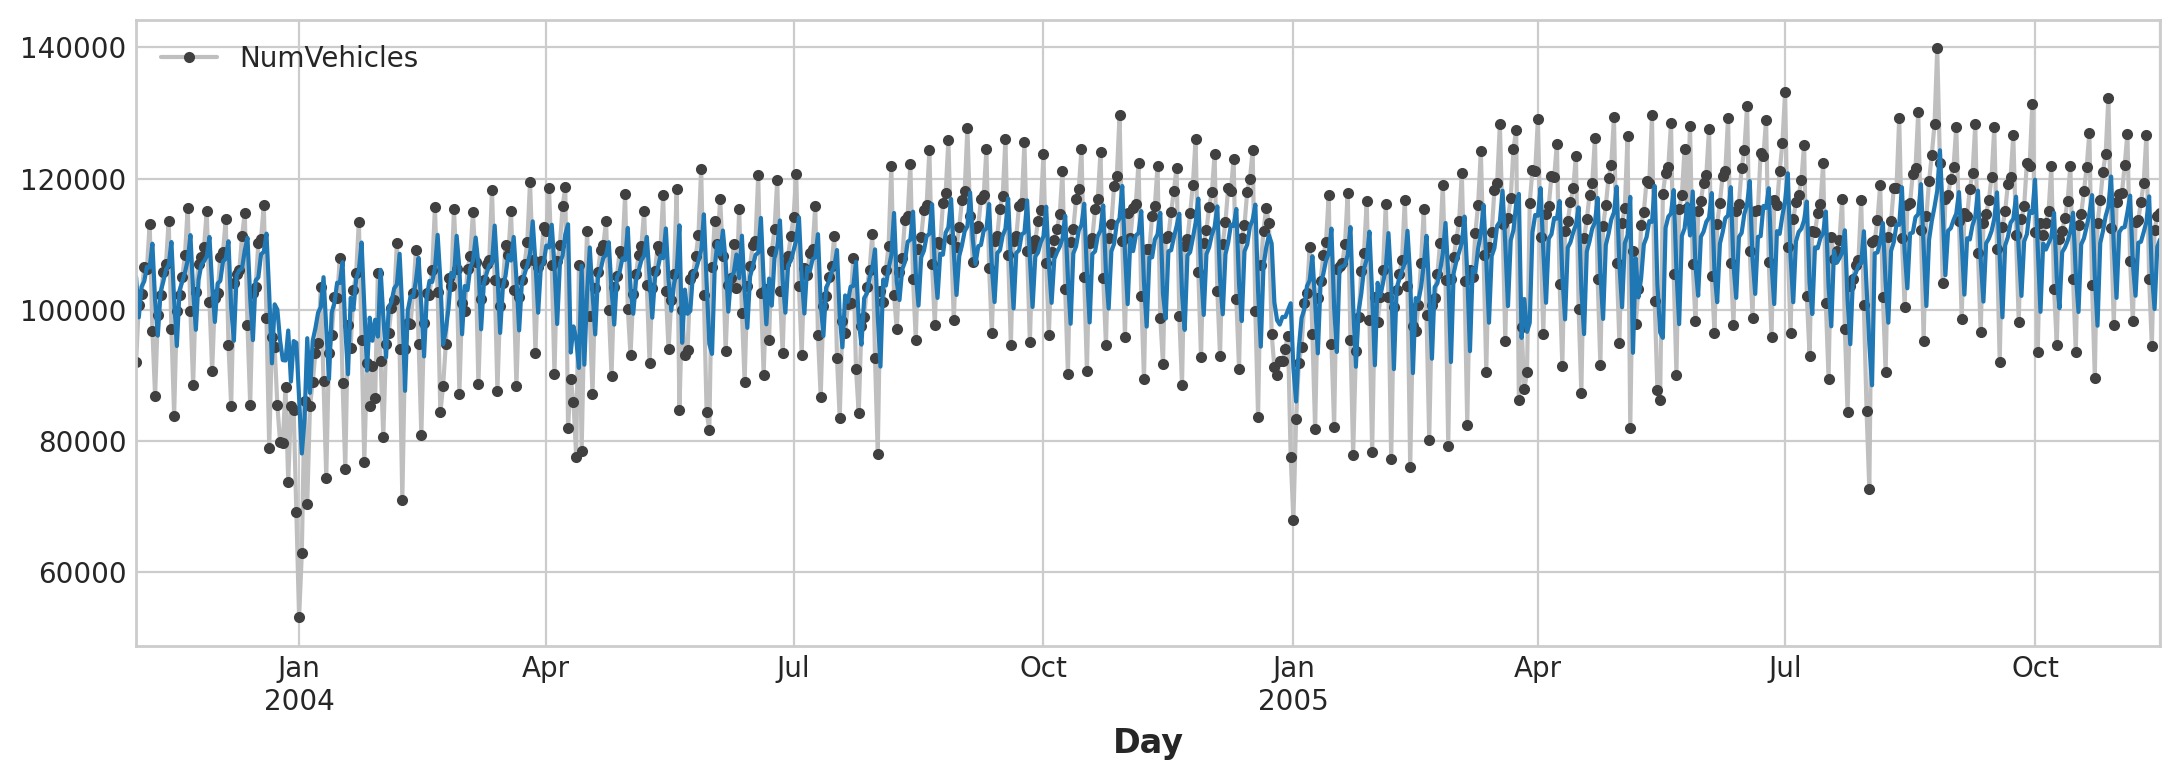

In [24]:
ax = y.plot(**plot_params)
ax = y_pred.plot()